<a href="https://colab.research.google.com/github/AlexanderSlokov/aiClassPracticeAssignments/blob/main/RiceCookerControler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 46.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=e7ed91c4862361bafa7305b43ca65e55db3fd93a12c0e939ade1a5ee4dbdc417
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [5]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [7]:
#add control about Time form 10 to 180 mins, the amount of rice form 100 to 1500 grams || input use Atecedent command

time = ctrl.Antecedent(np.arange(10,180,1),'time')
rice = ctrl.Antecedent(np.arange(100,1501,1),'rice')


In [16]:
#output is the ricecooker's power level from 0 to 100 percents || output use Consequent command

power = ctrl.Consequent(np.arange(0,101,1),'power')

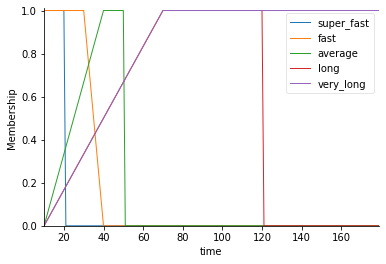

In [11]:
#create graph for TIME || the universe simply take the var inside the array set on np.arange

time['super_fast']=fuzz.trapmf(time.universe,[10,10,20,20])
time['fast']=fuzz.trapmf(time.universe,[10,10,30,40])
time['average']=fuzz.trapmf(time.universe,[10,40,50,50])
time['long']=fuzz.trapmf(time.universe,[10,70,120,120])
time['very_long']=fuzz.trapmf(time.universe,[10,70,180,180])

#view the graph
time.view()

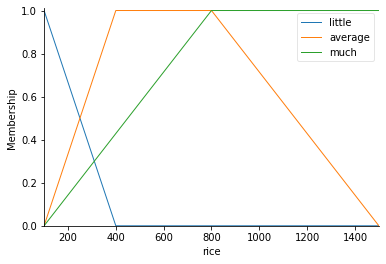

In [13]:
#create graph for RICE || the universe simply take the var inside the array set on np.arange
rice['little']=fuzz.trimf(rice.universe,[100,100,400])
rice['average']=fuzz.trapmf(rice.universe,[100,400,800,1500])
rice['much']=fuzz.trapmf(rice.universe,[100,800,1500,1500])

#view the graph
rice.view()

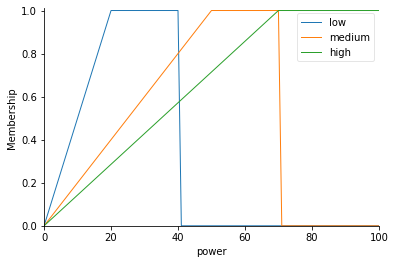

In [18]:
#create graph for OUTPUT_POWER || the universe simply take the var inside the array set on np.arange
power['low']=fuzz.trapmf(power.universe,[0,20,40,40])
power['medium']=fuzz.trapmf(power.universe,[0,50,70,70])
power['high']=fuzz.trapmf(power.universe,[0,70,100,100])

#view the graph
power.view()

In [22]:
#set rules for controler
rule1=ctrl.Rule(rice['little']&time['super_fast'],power['low'])
rule2=ctrl.Rule(rice['little']&time['fast'],power['low'])
rule3=ctrl.Rule(rice['little']&time['average'],power['low'])
rule4=ctrl.Rule(rice['little']&time['long'],power['low'])
rule5=ctrl.Rule(rice['little']&time['very_long'],power['low'])

rule6=ctrl.Rule(rice['average']&time['super_fast'],power['medium'])
rule7=ctrl.Rule(rice['average']&time['fast'],power['medium'])
rule8=ctrl.Rule(rice['average']&time['average'],power['medium'])
rule9=ctrl.Rule(rice['average']&time['long'],power['high'])
rule10=ctrl.Rule(rice['average']&time['very_long'],power['high'])

rule11=ctrl.Rule(rice['much']&time['super_fast'],power['high'])
rule12=ctrl.Rule(rice['much']&time['fast'],power['high'])
rule13=ctrl.Rule(rice['much']&time['average'],power['high'])
rule14=ctrl.Rule(rice['much']&time['long'],power['high'])
rule15=ctrl.Rule(rice['much']&time['very_long'],power['high'])


In [23]:
#begin training, how many rules much tell
powering_control = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])
powering = ctrl.ControlSystemSimulation(powering_control)

In [24]:
#input for testing
powering.input['rice'] = 500
powering.input['time'] = 50

57.468883205456144


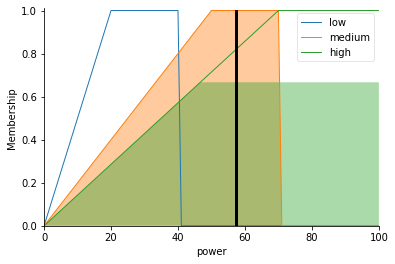

In [26]:
powering.compute()
print(powering.output['power'])
power.view(sim=powering)